<a href="https://colab.research.google.com/github/fcahyo/Customers-Segmentation/blob/master/customers-segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Segmentasi Konsumen Berdasarkan Produk Yang Dibeli Menggunakan Metode K-Means


---



## Konsep


### Clustering

A. Konsep Clustering

Clustering adalah metode penganalisaan data, yang sering dimasukkan sebagai salah satu metode Data Mining, yang bertujuan untuk mengelompokkan data dengan karakteristik yang sama. Ada 2 pendekatan yang digunakan dalam mengembangkan metode clustering, yaitu pendekatan partisi dan pendekatan hirarki. Clustering dengan pendekatan partisi biasanya mengelompokkan data dengan memilah-milah data yang dianalisa ke dalam cluster-cluster yang ada, sedangakan clustering pendekatan hirarki yaitu mengelompokkan data dengan membuat suatu hirarki berupa dendogram dimana data yang mirip akan ditempatkan pada hirarki yang berdekatan dan yang tidak pada hirarki akan berjauhan. <br><br>

B. Manfaat Clustering 

1. Clustering merupakan metode segmentasi data yang sangat berguna dalam prediksi dan analisa masalah bisnis tertentu. Misalnya segmentasi pasar, marketing dan pemetaan zonasi wilayah.
2. Identifikasi objek dalam berbagai bidang misalnya computer vision dan image processing

### K-Means

A. Konsep K-Means Clustering

K-Means Clustering adalah suatu metode penganalisan data atau metode data minning yang melakukan proses pemodelan unsupervised dan merupakan salah satu metode yang melakukan pengelompokan data dengan sistem partisi. Metode K-Means bertujuan untuk meminimalisasikan objective function yang diset dalam proses clustering dengan cara meminimalkan variasi antar data yang ada di dalam suatu cluster dan memaksimalkan variasi dengan data yang ada di cluster lainnya. <br><br>

B. Karakteristik K-Means

1. K-Means sangat cepat dalam proses clustering
2. K-Means sangat sensitif pada pembangkitan centorid awal secara random
3. Memungkinkan suatu cluster tidak mempunyai anggota
4. Hasil clustering dengan K-Means bersifat tidak unik (Selalu berubah-ubah) 
5. K-Means sangat sulit untuk mencapai global opimum

C. Kelebihan dan Kekurangan menggunakan K-Means

a. Kelebihan K-Means 

*   Mudah dalam pengimplementasian
*   Waktu yang dibutuhkan untuk melakukan pembelajaran lebih cepat.
*   Sangat fleksibel
*   Menggunakan prinsip yang sederhana dan dapat dijelaskan dalam non-statik

b. Kekurangan K-Means 

*   Data yang didapatkan bisa berbeda-beda, karena titik K diinisialisasikan secara random
*   Terjebak dalam kasus curse of dimmensionality
*   Jika terdapat banyak data, maka perhitungan dan pencarian titik terdekat sangat membutuhkan waktu yang lama.
*   Karena penentuan k random, maka tidak ada jaminan menemukan kumpulan cluster yang optimal









## Deskripsi Dataset

**Deskripsi :** <br>
Dataset yang digunakan diambil dari UCI Machine Learning Dataset. Dataset wholesale customers ini merupakan kumpulan data yang mengacu pada klien dari distributor grosir. Dataset ini berisi data pengeluaran tahunan dalam satuan moneter (monetary units / m.u.) untuk berbagai kategori produk <br><br>

**Informasi Atribut :** <br>

1. FRESH: annual spending (m.u.) on fresh products (Continuous); 
2. MILK: annual spending (m.u.) on milk products (Continuous); 
3. GROCERY: annual spending (m.u.)on grocery products (Continuous); 
4. FROZEN: annual spending (m.u.)on frozen products (Continuous) 
5. DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
6. DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
7. CHANNEL: customers’ Channel - Horeca (Hotel/Restaurant/Café) or Retail channel (Nominal) 
8. REGION: customers’ Region – Lisnon, Oporto or Other (Nominal)

<br>

**Sumber :** http://archive.ics.uci.edu/ml/datasets/wholesale+customers

## Analisis

### Persiapan

In [ ]:
# Import standard library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

# Import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Read dataset
try:
    data = pd.read_csv('wholesale-customers.csv')
    data.drop(labels=(['Channel','Region']), axis=1, inplace=True)
    print('Dataset Wholesale Customers memiliki {} data dan {} fitur'.format(*data.shape))
except:
    print('Maaf! Dataset tidak ditemukan.')

Dataset Wholesale Customers memiliki 440 data dan 6 fitur


In [ ]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [ ]:
# Dataset describe
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(6)
memory usage: 20.7 KB


### Memilih sampel

Memilih sampel yang akan digunakan untuk manualisasi algoritme K-Means

In [ ]:
# Select sample from the dataset
indices = [0, 9, 56, 137, 226, 349, 368, 370, 397, 399, 439]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print ("Sampel yang dipilih dari wholesale customers dataset:")
samples

Sampel yang dipilih dari wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,6006,11093,18881,1159,7425,2098
2,4098,29892,26866,2616,17740,1340
3,3087,8080,8282,661,721,36
4,20782,5921,9212,1759,2568,1553
5,5981,14641,20521,2005,12218,445
6,22335,1196,2406,2046,101,558
7,39679,3944,4955,1364,523,2235
8,11535,1666,1428,6838,64,743
9,9612,577,935,1601,469,375


### Cek Distribusi Data

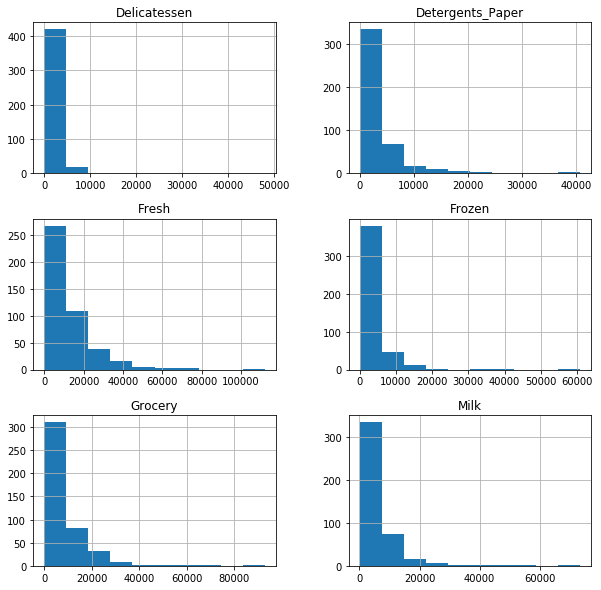

In [ ]:
# View distribution of dataset
data.hist(figsize=(10,10));

Setelah kita lihat dari grafik di atas, ternyata distribusi data untuk setiap fitur kurang merata dan kurang terdistribusi secara normal. Distribusi data cenderung condong ke kanan (postive skew). Karena distribusi yang kurang normal tersebut, maka kita perlu melakukan normalisasi.

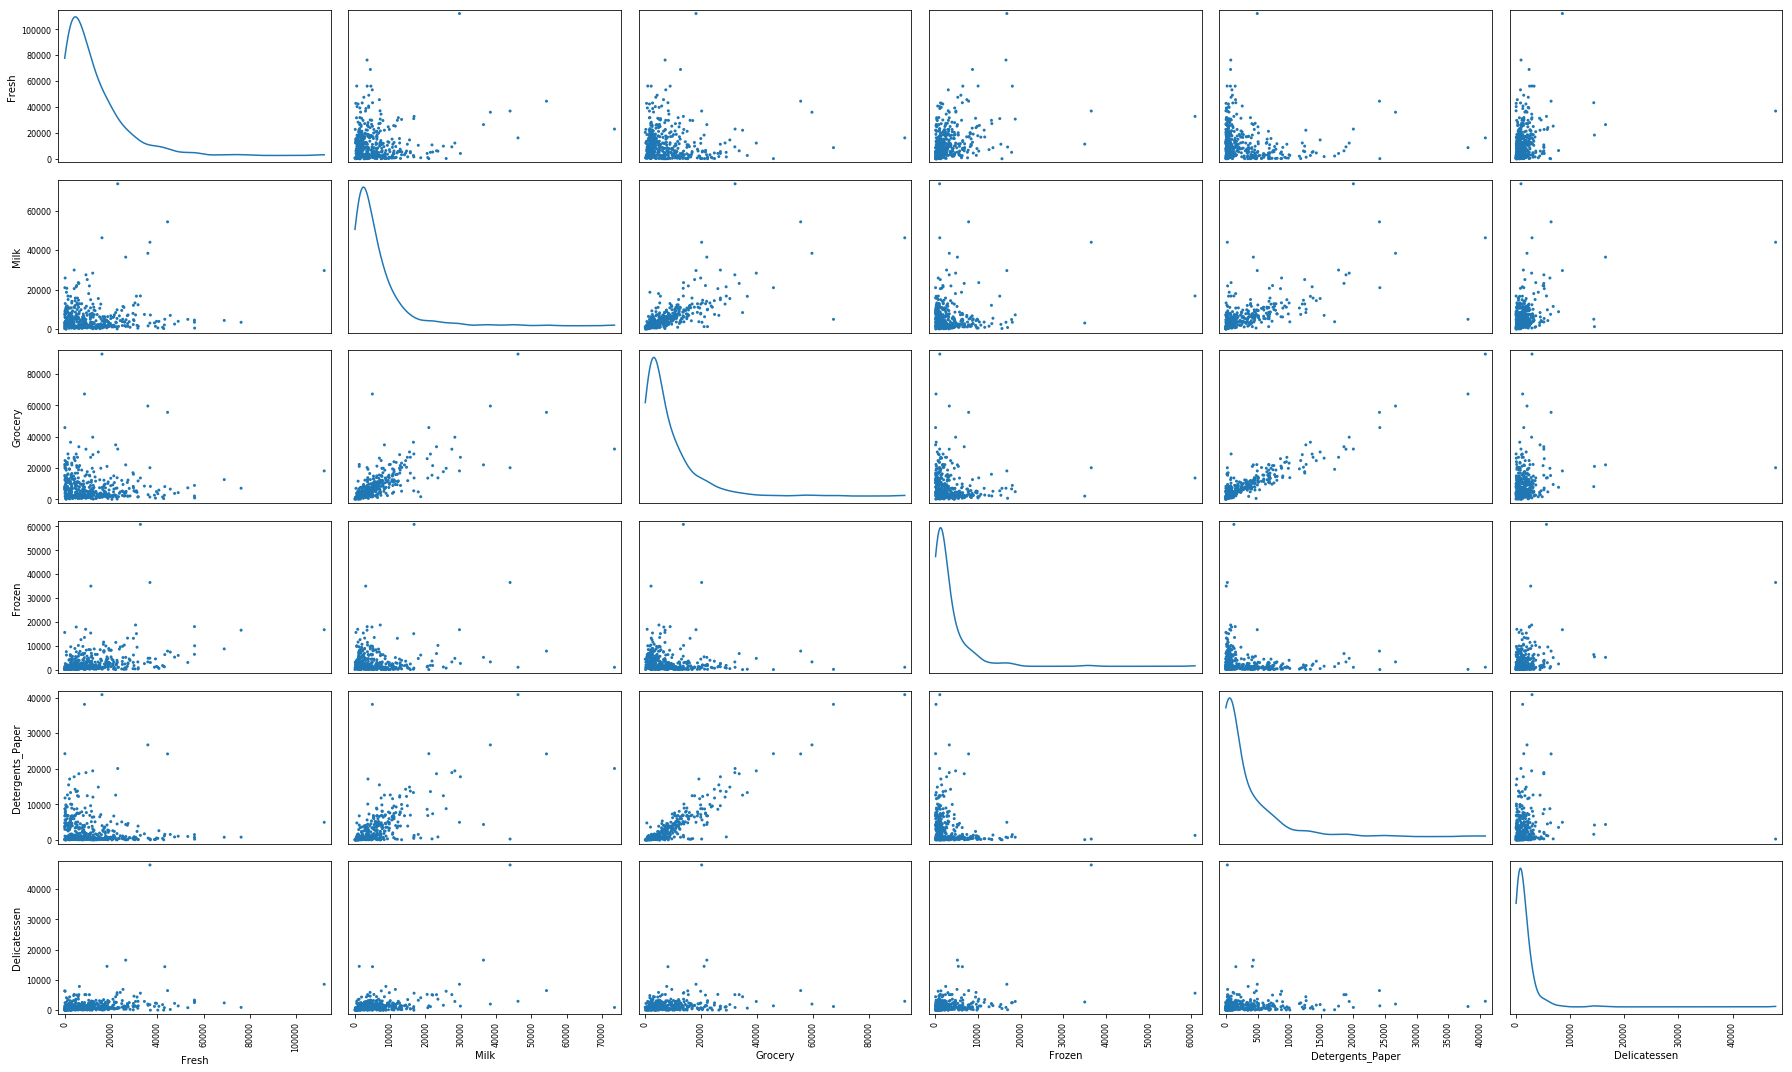

In [ ]:
pd.plotting.scatter_matrix(data, alpha=1, figsize=(25,15), diagonal='kde');
plt.tight_layout() # agar plotnya tidak overlap

Setelah kita lihat sebaran data melalui scatter, ternyata masih banyak data pencilan (outlier) pada dataset tersebut. Contoh seperti grafik scatter antara fitur grocery dengan milk, terlihat beberapa data cukup menyimpang jauh dari distribusinya. Oleh karena itu perlu dilakukan proses smoothing data untuk menghilangkan data-data pencilan ini.

### Cek Skewness

Skewness adalah derajat ketidaksimetrisan suatu distribusi. Jika kurva frekuensi suatu distribusi memiliki ekor yang lebih memanjang ke kanan (dilihat dari meannya) maka dikatakan menceng kanan (positif) dan jika sebaliknya maka menceng kiri (negatif). Secara perhitungan, skewness adalah momen ketiga terhadap mean. Distribusi normal (dan distribusi simetris lainnya, misalnya distribusi t atau Cauchy) memiliki skewness 0 (nol). <br>

![](https://cdn-images-1.medium.com/max/1600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)

In [ ]:
print('\nMean:\n', data.mean())
print('\nMedian:\n', data.median())
print('\nMode:\n', data.mode().loc[0])


Mean:
 Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

Median:
 Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64

Mode:
 Fresh                 3.0
Milk                577.0
Grocery             683.0
Frozen              133.0
Detergents_Paper      3.0
Delicatessen          3.0
Name: 0, dtype: float64


Saat kita lakukan cek distribusi data, terlihat bahwa masing-masing fitur memiliki distribusi yang condong ke kanan (positive skew). Ini artinya bahwa masing-masing fitur memiliki mean yang terletak di sebelah kanan (nilai mean lebih besar dari nilai median dan modenya). Hal ini dibuktikan pada tampilan output di atas

In [ ]:
print('Nilai Skewness:')
data.skew()

Nilai Skewness:


Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicatessen        11.151586
dtype: float64

Terlihat fitur-fitur di atas memiliki nilai skewness yang tinggi sehingga fitur-fitur tersebut menyimpang jauh dari distribusi normal. Kemudian terlihat pula bahwa masing-masing fitur memiliki nilai positive skew sehingga grafiknya akan menceng ke kanan. Oleh karena itu maka perlu dilakukan normalisasi untuk setiap fitur agar dapat mendekati kurva distribusi normal

### Cek Korelasi Atribut

Uji Pearson Product Moment adalah salah satu dari beberapa jenis uji korelasi yang digunakan untuk mengetahui derajat keeratan hubungan 2 variabel yang berskala interval atau rasio, di mana dengan uji ini akan mengembalikan nilai koefisien korelasi yang nilainya berkisar antara -1, 0 dan 1. Nilai -1 artinya terdapat korelasi negatif yang sempurna, 0 artinya tidak ada korelasi dan nilai 1 berarti ada korelasi positif yang sempurna.

Rentang dari koefisien korelasi yang berkisar antara -1, 0 dan 1 tersebut dapat disimpulkan bahwa apabila semakin mendekati nilai 1 atau -1 maka hubungan makin erat, sedangkan jika semakin mendekati 0 maka hubungan semakin lemah. <br><br>

**Koefisien Korelasi Pearson Product Moment** <br>
![](https://i2.wp.com/www.statistikian.com/wp-content/uploads/blogger/-ziyIYtPwW3U/U0jNjkwBZKI/AAAAAAAACik/bREUN-MTd1c/s1600/pearson%2Btabel%2Bkoefisien.JPG?zoom=1.25&resize=400%2C72)
<br><br>
![](https://i0.wp.com/www.smartstat.info/images/stories/statistik/korelasi/korelasi-scatter.png)
<br><br>

Berdasarkan tabel di atas, dapat kami jelaskan tentang nilai koefisien korelasi uji pearson product moment dan makna keeratannya dalam sebuah analisis statistik atau analisis data. Berikut penjelasannya:

1. Nilai koefisien 0 = Tidak ada hubungan sama sekali (jarang terjadi),
2. Nilai koefisien 1 = Hubungan sempurna (jarang terjadi),
3. Nilai koefisien > 0 sd < 0,2 = Hubungan sangat rendah atau sangat lemah,
4. Nilai koefisien 0,2 sd < 0,4 = Hubungan rendah atau lemah,
5. Nilai koefisien 0,4 sd < 0,6 = Hubungan cukup besar atau cukup kuat,
6. Nilai koefisien 0,6 sd < 0,8 = Hubungan besar atau kuat,
7. Nilai koefisien 0,8 sd < 1 = Hubungan sangat besar atau sangat kuat.
8. Nilai negatif berarti menentukan arah hubungan, misal: koefisien korelasi antara penghasilan dan berat badan bernilai -0,5. Artinya semakin tinggi nilai penghasilan seseorang maka semakin rendah berat badannya dengan besarnya keeratan hubungan sebesar 0,5 atau cukup kuat (lihat tabel di atas).
<br><br>

**Rumus Uji Pearson Product Moment** <br>
![](https://i0.wp.com/www.statistikian.com/wp-content/uploads/2012/07/Uji-Pearson-Product-Moment.jpg?w=346&ssl=1)

Text(0.5, 1.0, 'Correlation Matrix')

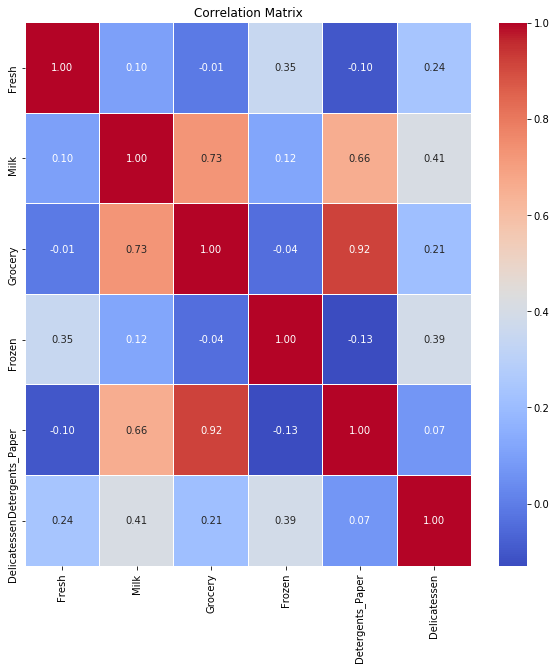

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.05)
plt.title('Correlation Matrix')

Dari pengujian korelasi di atas, dapat dibuat hipotesis sebagai berikut:
1. Produk fresh memiliki korelasi yang rendah dengan produk-produk lain, sehingga perubahan pada produk fresh tidak terlalu mempengaruhi produk-produk lain.
2. Produk milk memiliki korelasi yang cukup tinggi dengan produk grocery, detergent_paper, dan delicatessen, sehingga perubahan pada produk milk akan mempengaruhi secara positif (searah) terhadap produk-produk tersebut. Ketika produk milk berkurang maka ketiga produk tersebut ikut berkurang, begitupun sebaliknya. Jadi kemungkinan customer yang membeli produk milk juga akan membeli ketiga produk tersebut.
3. Produk grocery memiliki korelasi yang sangat tinggi dengan produk milk, dan detergent_paper, sehingga perubahan pada produk grocery akan mempengaruhi secara positif (searah) terhadap produk-produk tersebut. Ketika produk grocery berkurang maka kedua produk tersebut ikut berkurang, begitupun sebaliknya. Jadi kemungkinan customer yang membeli produk grocery juga akan membeli kedua produk tersebut.
4. Produk frozen memiliki korelasi yang rendah dengan produk-produk lain, sehingga perubahan pada produk frozen tidak terlalu mempengaruhi produk-produk lain.
5. Produk detergent_paper memiliki korelasi yang sangat tinggi dengan produk milk, dan grocery, sehingga perubahan pada produk detergent_paper akan mempengaruhi secara positif (searah) terhadap produk-produk tersebut. Ketika produk detergent_paper berkurang maka kedua produk tersebut ikut berkurang, begitupun sebaliknya. Jadi kemungkinan customer yang membeli produk detergent_paper juga akan membeli kedua produk tersebut.
6. Produk delicatessen memiliki korelasi yang cukup tinggi dengan produk milk, sehingga perubahan pada produk delicatessen akan mempengaruhi secara positif (searah) terhadap produk milk tersebut. Ketika produk delicatessen berkurang maka produk milk tersebut ikut berkurang, begitupun sebaliknya. Jadi kemungkinan customer yang membeli produk delicatessen juga akan membeli produk milk tersebut.

## Preprocessing

### Hitung Missing Value

In [ ]:
data.isna().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

Karena tidak ada missing value pada dataset ini, maka kami tidak perlu melakukan apapun untuk cleaning data

### Normalisasi

In [ ]:
# Min-Max Normalization
# Min-Max = (x-min) / (max-min)
mms = MinMaxScaler()
result = mms.fit_transform(samples)
samples = pd.DataFrame(data=result, columns=samples.columns)

# # Standard Normalization (Z-Score)
# # Z = (x-mean) / (standard deviation)
# ss = StandardScaler()
# result = ss.fit_transform(data)
# data = pd.DataFrame(data=result, columns=data.columns)
# data.hist(figsize=(10,10));

# Power Transform
# pt = PowerTransformer(method='box-cox')
# result = pt.fit_transform(data)
# data = pd.DataFrame(data=result, columns=data.columns)

# Log Transformation
data = pd.DataFrame(data=np.log(data), columns=data.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


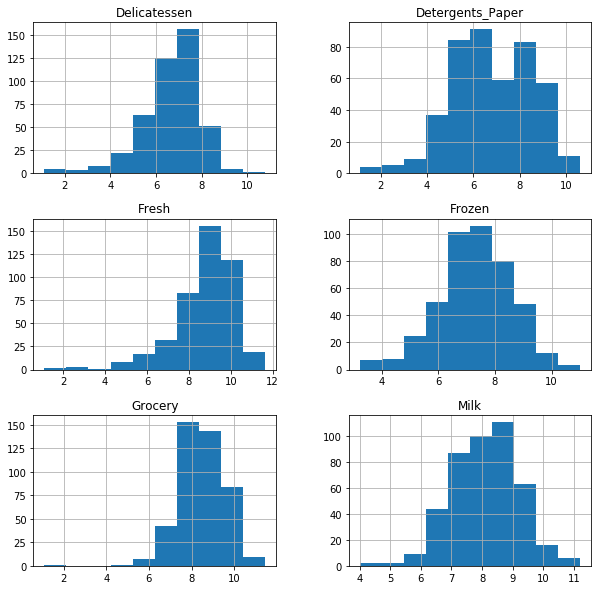

In [ ]:
data.hist(figsize=(10,10));

Masing-masing fitur sudah terlihat mendekati kurva distribusi normal

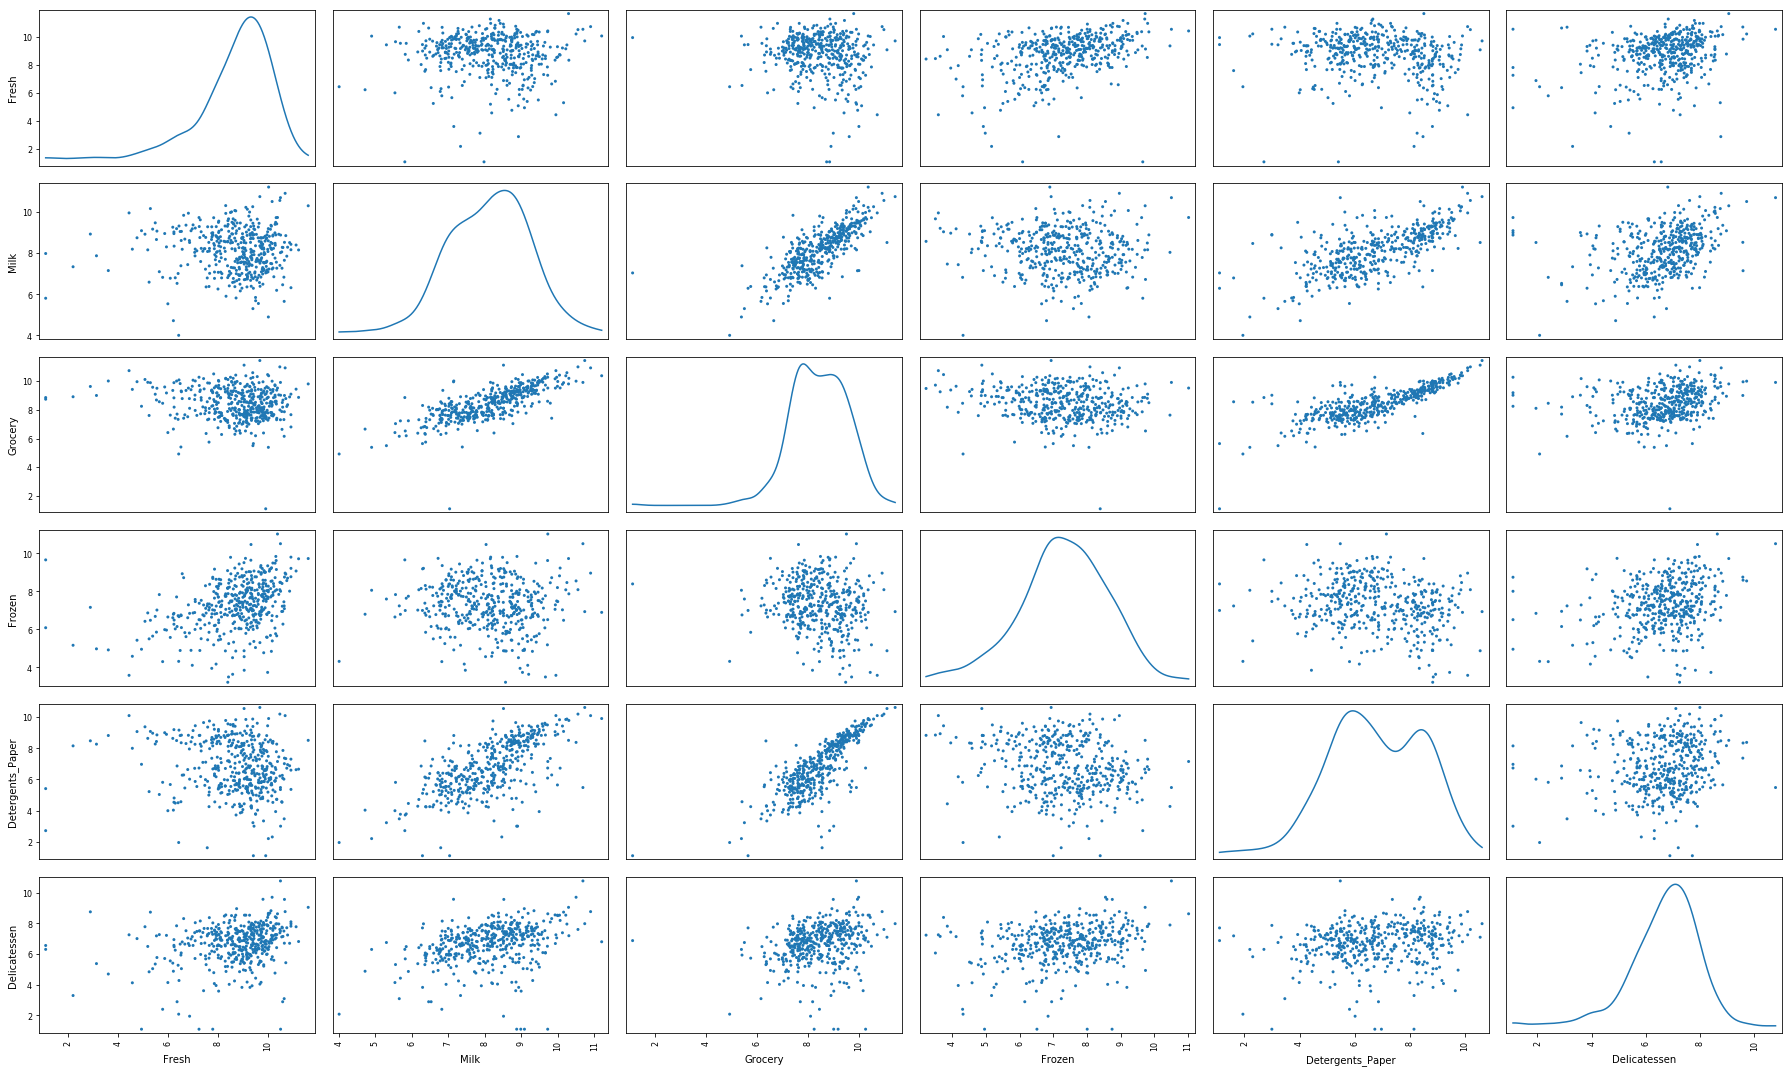

In [ ]:
pd.plotting.scatter_matrix(data, alpha=1, figsize=(25,15), diagonal='kde');
plt.tight_layout() # agar plotnya tidak overlap

Masih terdapat beberapa data pencilan yang terlihat di atas seperti pada grafik scatter antara fitur detergent_paper dan fresh

### Deteksi Outlier

#### Mendeteksi outlier dengan box-plot

Box plot atau boxplot (juga dikenal sebagai diagram box-and-whisker) merupakan suatu box
(kotak berbentuk bujur sangkar). Boxplot adalah salah satu cara dalam statistik deskriptif untuk
menggambarkan secara grafik dari data numeris melalui lima ukuran sebagai berikut:
- nilai observasi terkecil,
- kuartil terendah atau kuartil pertama (Q1), yang memotong 25 % dari data terendah
- median (Q2) atau nilai pertengahan
- kuartil tertinggi atau kuartil ketiga (Q3), yang memotong 25 % dari data tertinggi
- nilai observasi terbesar.

Dalam boxplot juga ditunjukkan, jika ada, nilai outlier dari observasi

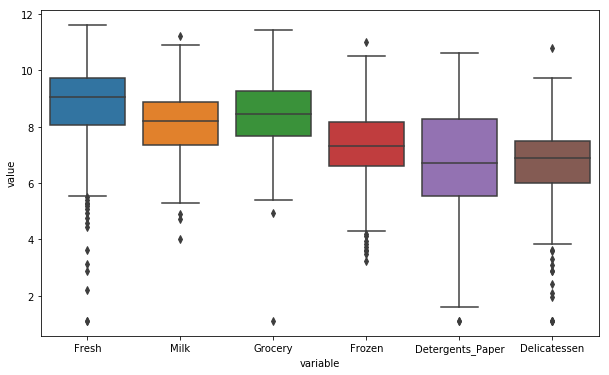

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="variable", y="value", data=pd.melt(data))

#### IQR Score

Box-plot menggunakan metode IQR (<i>interquartile range</i>) untuk menampilkan datanya.

- The first quartile Q1 is the 25th percentile, cuts off the lowest 25% of the data.
- The third quartile Q3 is the 75th percentile, cuts off the lowest 75% (or highest 25%) of the data. 
- The second quartile Q2 is the 50th percentile (median), the center of the data distribution.

![teks alternatif](https://vt-vtwa-assets.varsitytutors.com/vt-vtwa/uploads/problem_question_image/image/46591/How_to_find_IQR_Boxplot_Image.jpg)

<i>Interquartile range</i> (IQR) jarak antara kuartil pertama dan ketiga

<b>IQR = Q3 - Q1</b>

Outlier: 

<b>nilai < Q1 – 1,5 x IQR dan nilai > Q3+ 1,5 x IQR </b>




In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Fresh               1.689005
Milk                1.545499
Grocery             1.599237
Frozen              1.566218
Detergents_Paper    2.726239
Delicatessen        1.494854
dtype: float64


In [ ]:
original = data.shape
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Data dengan outlier              : ', original)
print('Data setelah outlier dihilangkan : ', data.shape)

Data dengan outlier              :  (440, 6)
Data setelah outlier dihilangkan :  (398, 6)


## Feature Transformation

### Principal Component Analysis

Analisis Komponen Utama (Principal Component Analysis) adalah analisis multivariate yang mentransformasi variabel-variabel asal yang saling berkorelasi menjadi variabel-variabel baru yang tidak saling berkorelasi dengan mereduksi sejumlah variabel tersebut sehingga mempunyai dimensi yang lebih kecil namun dapat menerangkan sebagian besar keragaman variabel aslinya. Tujuan PCA adalah untuk mengurangi dimensi data dengan mempertahankan sebanyak mungkin informasi dari dataset yang asli. <br><br>

Algoritme Principal Component Analysis (PCA) :
1. Mencari mean global
2. Menghitung zero mean
3. Membangun matriks kovarian dengan mengalikan matriks zero mean dengan transposenya
4. Menghitung eigen value
5. Menghitung eigen vector
6. Mengurangi dimensi sebesar K dimensi

In [ ]:
def pca_results(good_data, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

Setelah data telah dinormalisasi dan tidak memiliki outlier, kita dapat menerapkan PCA untuk menemukan dimensi mana dari data yang paling baik memaksimalkan variansi dari fitur yang ada.

Dalam PCA juga ada nilai variance ratio yaitu variansi dari data berdasarkan dimensinya. Dimensi disini dapat dianggap sebagai komposisi dari setiap fitur

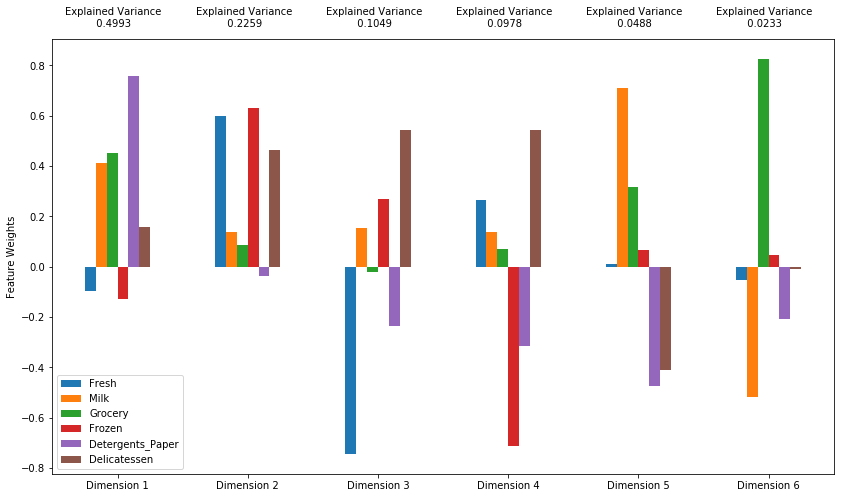

In [ ]:
# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6) # random_state only available from 0.18.0 onwards
pca.fit(data)

# Generate PCA results plot
pca_results = pca_results(data, pca)

Disini, kita akan mereduksi fitur menjadi 2 dimensi sehingga dipilih 2 fitur teratas yang memiliki nilai variansi yang besar yaitu:

- Principal Component 1: 49.9%
- Principal Component 2: 22.6%

- Total: 72.5%

Setiap komponen mewakili jumlah pembelian produk oleh customer, jika bernilai semakin positif maka menandakan peningkatan pembelian suatu produk begitu pula sebaliknya.

In [ ]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(data)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

## Algoritme K-Means

1.   Tentukan jumlah cluster.
2.   Alokasikan masing-masing data ke dalam cluster secara acak.
3.   Htung pusat cluster (centroid) dari data yang ada pada masing-masing cluster.
4.   Hitung jarak masing-masing data ke tiap centroid.
5.   Alokasikan masing-masing data ke centroid terdekat.
6.   Kembali ke langkah 3 sampai tidak ada data yang berpindah cluster lagi.




In [ ]:
def produceKMeans(k):
    global clusterer, preds, centers
    
    # Apply k-means to the data 
    clusterer = KMeans(n_clusters=k, random_state=0)
    clusterer.fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.cluster_centers_

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    return score

In [ ]:
def cluster_results(data, preds, centers):
	'''
	Visualizes the cluster data in two dimensions
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('coolwarm')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);


In [ ]:
# Apply k-means to the data sample
clusterer_sample = KMeans(n_clusters=2, random_state=0)
clusterer_sample.fit(samples)

# Predict the cluster for each data point
preds_sample = clusterer_sample.predict(samples)

# Find the cluster centers
centers_sample = clusterer_sample.cluster_centers_

# Cluster label
labels_sample = clusterer_sample.labels_
print('Kelompok/Cluster hasil sample: ', labels_sample)

Kelompok/Cluster hasil sample:  [1 0 0 1 1 0 1 1 1 1 1]


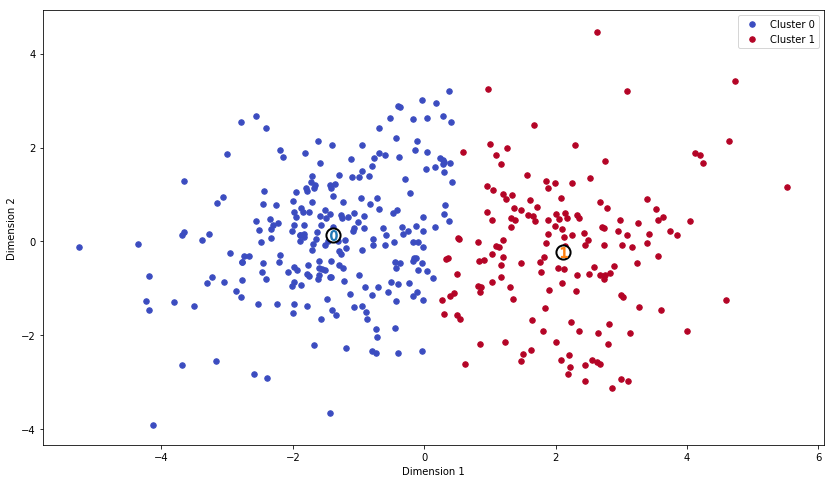

In [ ]:
produceKMeans(2)

cluster_results(reduced_data, preds, centers)

Setiap cluster diatas memiliki centroid. Centroid ini merupakan rata2 dari semua data yang telah dikelompokkan berdasarkan masing-masing clusternya.

Dalam kasus ini, centroid dalam data tersebut merupakan rata2 customer dari segmen tersebut.

Dikarenakan datanya masih dalam bentuk yang dimensinya tereduksi dan sudah dinormalisasi, kita dapat mengembalikannya ke dalam bentuk awal dengan menggunakan **inverse transformations** agar kita bisa mengetahui nilai dari jumlah produk yang dibeli dan membuat segmentasi customer.

In [ ]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9451.0,1938.0,2449.0,2200.0,307.0,771.0
Segment 1,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0


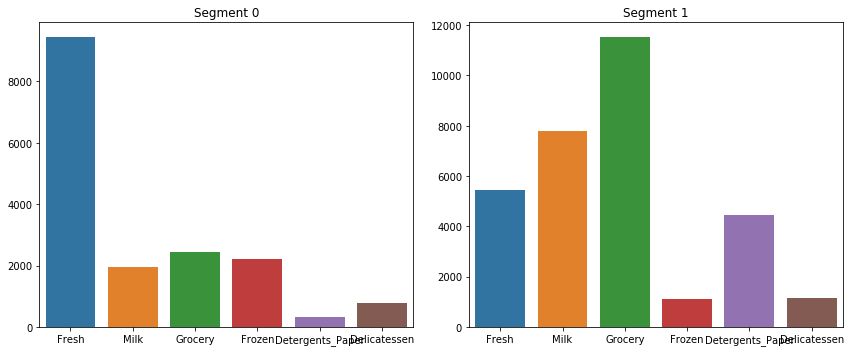

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,5), squeeze=False)

axs[0][0].set_title('Segment 0')
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[0].values, ax = axs[0][0])

axs[0][1].set_title('Segment 1')
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[1].values, ax = axs[0][1])

plt.tight_layout()

**- Cluster/Segment 0**: 
Kemungkinan besar merepresentasikan cafe/restaurant yang menyediakan banyak fresh food.

**- Cluster/Segment 1**:
Jumlah pembelian produk grocery dan milk cukup dominan disini, yang menunjukkan kemungkinan bahwa ini adalah distributor atau reseller yang cukup besar seperti supermarket.

## Evaluasi

Pada Pengujian ini akan menghitung nilai relasi antara sebuah objek dengan clusternya dan seberapa jauh jarak sebuah cluster dengan cluster lainnya. Untuk mencari nilai tersebut, Metode pengujian yang digunakan adalah metode Silhouette Coefficient. Silhouette coefficient merupakan gabungan dari dua metode yaitu metode cohesion yang berfungsi untuk mengukur seberapa dekat relasi antar objek dalam sebuah cluster, dan metode separation yang berfungsi untuk mengukur jarak antara satu cluster dengan cluster yang lainnya.
Sehingga pengujian silhouette ini akan melihat kualitas dan kekuatan sebuah cluster. Pengujian dilakukan terhadap hasil dari clustering menggunakan metode k-means.
<br><br>

Tahapan perhitungan silhouette coefficient :
1. Hitung rata-rata jarak objek dengan semua objek lain yang berada di dalam satu cluster <br>
![](https://4.bp.blogspot.com/-N_MJgR4nEpk/W-p3sQhYGWI/AAAAAAAAAhA/Y-3EgUKfEwMbl2tc5U79gVzFu-OIH_z9ACLcBGAs/s1600/1.jpg)
2. Hitung rata-rata jarak objek dengan semua objek lain yang berada pada cluster lain, kemudian ambil nilai paling minimum <br>
![](https://1.bp.blogspot.com/-hNiMAjEJ5-A/W-p3seN0-sI/AAAAAAAAAg4/mPEZXt7zc9QmNMYgknIrkHW9eAb8rSszACEwYBhgL/s1600/2.jpg)
3. Hitung nilai silhouette coefficient <br>
![](https://1.bp.blogspot.com/-RD8YmZr6W54/W-p3sXDaH7I/AAAAAAAAAg8/OGdzHCeB1v0JmgalpKU0DfrtQsnjVeklQCEwYBhgL/s1600/3.jpg)

Parameter kualitas nilai silhouette coefficient terletak pada kisaran nilai -1 hingga 1. Semakin nilai silhouette coefficient mendekati nilai 1, maka semakin baik pengelompokan data dalam satu cluster. Sebaliknya jika silhouette coefficient mendekati nilai -1, maka semakin buruk pengelompokan data didalam satu cluster

In [ ]:
# For evaluation
results = pd.DataFrame(columns=['Silhouette Score'])
results.columns.name = 'Number of Clusters'    
for k in range(2,16):
    score = produceKMeans(k) 
    results = results.append(pd.DataFrame([score],columns=['Silhouette Score'],index=[k]))

results

Number of Clusters,Silhouette Score
2,0.447158
3,0.363986
4,0.331151
5,0.352412
6,0.362761
7,0.354716
8,0.367261
9,0.367312
10,0.351812
11,0.358248


Dilihat dari hasil evaluasi di atas ternyata jumlah cluster yang paling bagus adalah 2 cluster. Hal ini dikarenakan pembagian menjadi 2 cluster memiliki nilai silhouette coefficient tertinggi dimana ketika nilai silhouette coefficient mendekati nilai 1, maka semakin baik pengelompokan data dalam satu cluster.

## Kesimpulan

Dari hasil analisis di atas dapat diambil kesimpulan bahwa :


1. Metode K-Means dapat diimplementasikan untuk *clustering*  customer 
2. Kualitas clustering dapat dilihat dari nilai silhoute coefficient, dimana dengan jumlah cluster 2 adalah yang paling baik dengan nilai 0.44. Sedangkan untuk cluster selain 2 menghasilkan nilai silhoute coefficient 0.33-0.36
3. Sebaiknya menambahkan stok untuk produk grocery, milk, dan detergent_paper, karena ketiga produk tersebut memiliki korelasi yang sangat kuat sehingga ketika salah satu produk berkurang stoknya maka produk yang lain juga akan berkurang. Itu artinya ketika customer membeli salah satu produk tersebut, maka kemungkinan dia juga membeli kedua produk yang lain
4. Terdapat dua tipe customer yang paling dominan membeli produk pada distributor tersebut. Customer tipe pertama adalah customer yang kecenderungannya membeli produk-produk fresh food sedangkan customer tipe kedua adalah customer yang kecenderungannya membeli produk grocery dan milk dimana kedua produk ini memang mempunyai korelasi yang sangat kuat
5. Customer tipe pertama kemungkinan adalah customer dari pihak cafe/restaurant yang menyediakan banyak fresh food sedangkan customer tipe kedua kemungkinan adalah distributor atau reseller yang cukup besar seperti supermarket

Walaupun ada banyak metode clustering yang bisa digunakan pada analisis data mining, namun analisis dengan menggunakan metode K-Means ini cukup membantu untuk mengetahui karakteristik yang ada pada sebuah dataset. 

